In [1]:
import pandas as pd

df = pd.read_csv("../Data/2016-trump-vs-clinton.csv")
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null float64
Clinton                   1522 non-null float64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 202.3+ KB


In [3]:
df.drop(['Pollster URL', 'Source URL', 'Partisan', 'Question Text', 'Question Iteration'], axis=1, inplace=True)
df.head(2)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Affiliation
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,None
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,None


In [4]:
import matplotlib.pyplot as plt

df['Affiliation'].value_counts().to_frame().plot.bar(color='orange', figsize=(14, 6))
plt.show()

<Figure size 1400x600 with 1 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


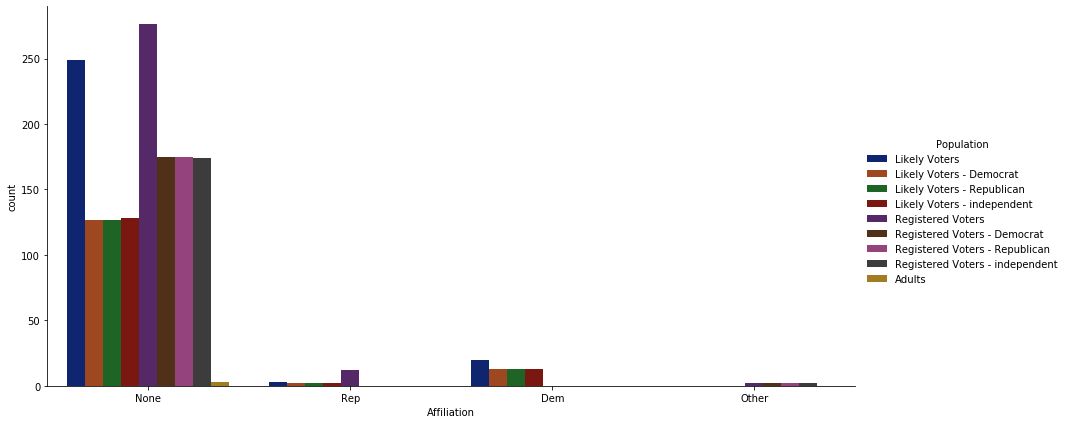

In [5]:
import seaborn as sns

sns.factorplot('Affiliation', data=df, kind='count', legend=True, hue='Population', size=6, aspect=2, palette='dark')
plt.show()

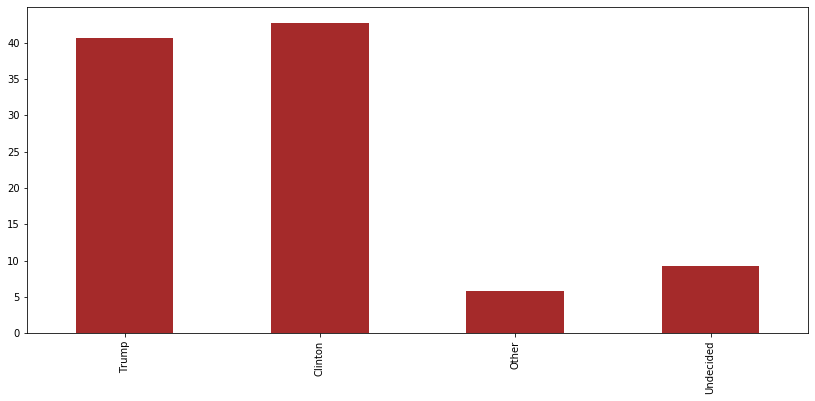

In [6]:
df.mean().to_frame().drop('Number of Observations').plot.bar(figsize=(14, 6), color='brown', legend=False)
plt.show()

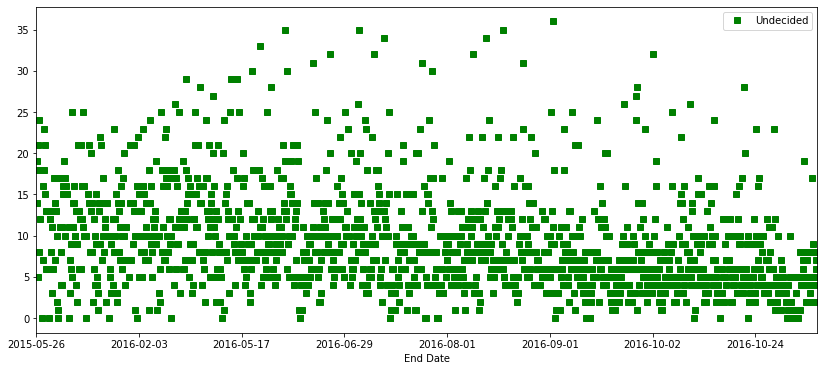

In [7]:
time_sorted_df = df.sort_values('End Date')
time_sorted_df.plot(x='End Date', y='Undecided', linestyle='', marker='s', color='green', figsize=(14, 6))

In [8]:
from datetime import datetime

df['diff'] = (df['Trump'] - df['Clinton']) / 100.0
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Affiliation,diff
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,None,-0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,None,-0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,None,0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,None,-0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,None,0.02


In [9]:
df = df.groupby('Start Date', as_index=False).mean()

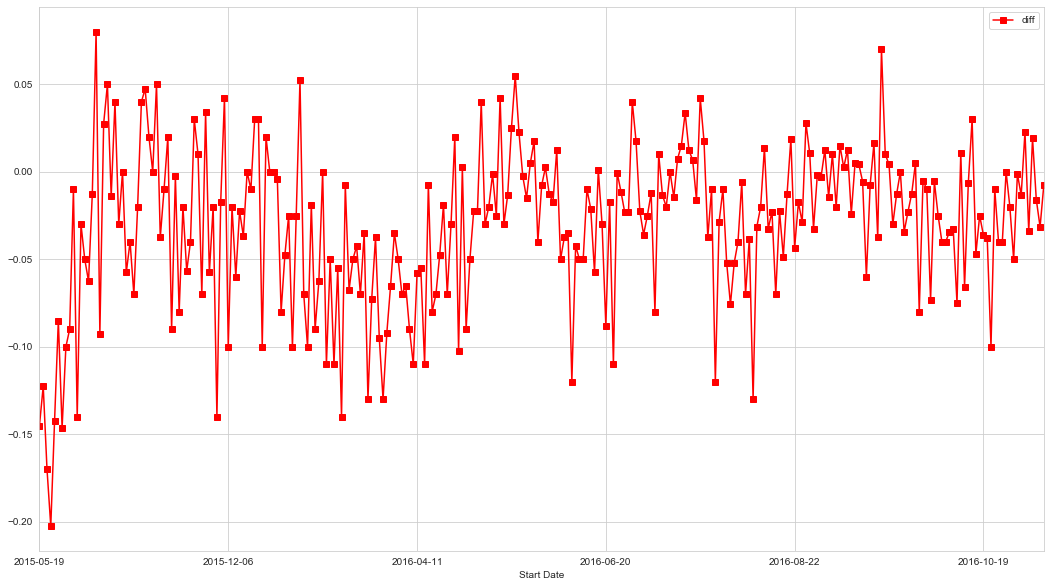

In [10]:
sns.set_style("whitegrid")
df.plot('Start Date', 'diff', figsize=(18, 10), marker='s', color='red')
plt.show()

In [11]:
# Debate dates: Sept 26th, Oct 9th and Oct 19th 0f 2016

row_in = 0
x_limit = []

for date in df['Start Date']:
    if date[0:7] == '2016-09':
        x_limit.append(row_in)
    if date[0:7] == '2016-10':
        x_limit.append(row_in)
    row_in += 1

print(min(x_limit))
print(max(x_limit))

209
262


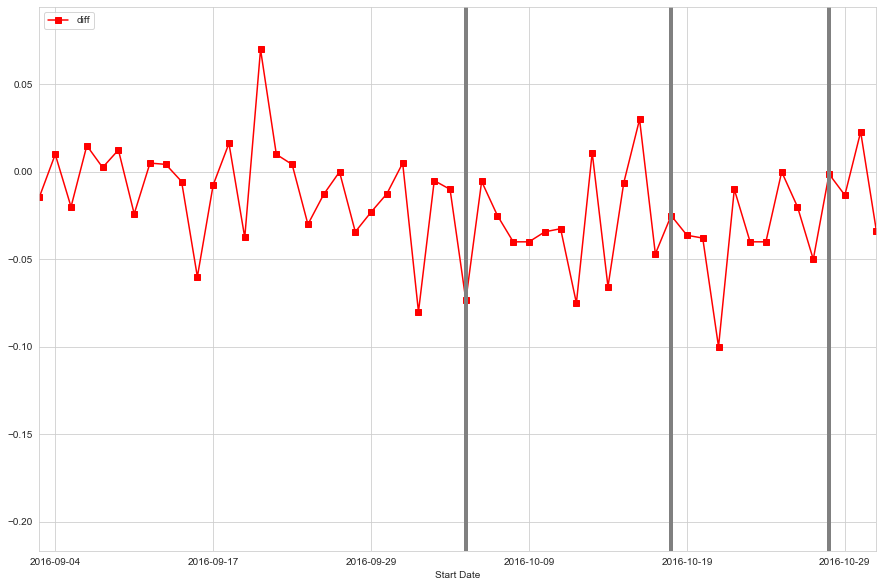

In [12]:
df.plot('Start Date', 'diff', figsize=(15, 10), marker='s', color='red', xlim=(209, 262))
plt.axvline(x=209+27, linewidth=4, color='grey')
plt.axvline(x=209+40, linewidth=4, color='grey')
plt.axvline(x=209+50, linewidth=4, color='grey')
plt.show()

In [13]:
donor_df = pd.read_csv('../Data/Donor_Data.csv')
donor_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1152124,P2016
1,C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-Mar-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559.0,SA17.1153048,P2016
2,C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,98309998,DIPLOMAT,US GOVERNMENT,100.0,20-Feb-16,NaN,NaN,NaN,SA17A,1056862.0,SA17.1020839,P2016
3,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,90960009,US ARMY,PHYSICIAN,200.0,10-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1078677,P2016
4,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,90960009,US ARMY,PHYSICIAN,100.0,08-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1074981,P2016


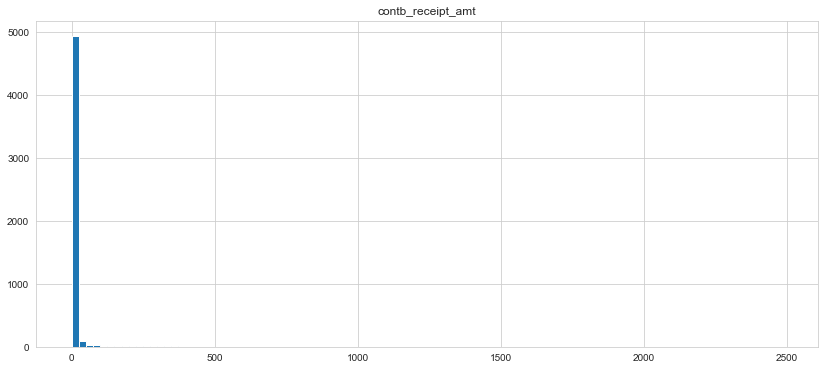

In [14]:
contb = donor_df['contb_receipt_amt'].value_counts(sort=True).to_frame()
contb['contb_receipt_amt'] = contb['contb_receipt_amt'].apply(lambda x: int(x))
contb = contb[contb['contb_receipt_amt'] < 2500]
contb.hist(bins=100, figsize=(14, 6))
plt.show()

In [15]:
party_map = {'Rubio, Marco': 'Republican',
           'Santorum, Richard J.': 'Republican',
           'Perry, James R. (Rick)': 'Republican',
           'Carson, Benjamin S.': 'Republican',
           "Cruz, Rafael Edward 'Ted'": 'Republican',
           'Paul, Rand': 'Republican',
           'Clinton, Hillary Rodham': 'Democrat'}

donor_df['Party'] = donor_df['cand_nm'].map(party_map)

In [16]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp,Party
0,C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1152124,P2016,Republican
1,C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-Mar-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559.0,SA17.1153048,P2016,Republican
2,C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,98309998,DIPLOMAT,US GOVERNMENT,100.0,20-Feb-16,NaN,NaN,NaN,SA17A,1056862.0,SA17.1020839,P2016,Republican
3,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,90960009,US ARMY,PHYSICIAN,200.0,10-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1078677,P2016,Republican
4,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,90960009,US ARMY,PHYSICIAN,100.0,08-Mar-16,NaN,NaN,NaN,SA17A,1082559.0,SA17.1074981,P2016,Republican


In [17]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Carson, Benjamin S.          248227
Clinton, Hillary Rodham      104541
Cruz, Rafael Edward 'Ted'    557581
Paul, Rand                    32485
Perry, James R. (Rick)          908
Rubio, Marco                 104814
Santorum, Richard J.              3
Name: contb_receipt_amt, dtype: int64

In [18]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
i = 0
for don in cand_amount:
    print("The candidate %s raised %.0f dollars\n" % (cand_amount.index[i], don))
    i +=1

The candidate Carson, Benjamin S. raised 26260761 dollars

The candidate Clinton, Hillary Rodham raised 9344247 dollars

The candidate Cruz, Rafael Edward 'Ted' raised 56306811 dollars

The candidate Paul, Rand raised 5911533 dollars

The candidate Perry, James R. (Rick) raised 1120363 dollars

The candidate Rubio, Marco raised 31302059 dollars

The candidate Santorum, Richard J. raised -1150 dollars

